THIS FILE SHOWCASES ALL FEATURE IN THE DATASET.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import shap
#from shap.plots import *
df = pd.read_csv('train.csv')





numbers_col = df.select_dtypes(include = ['float64', 'int64'])

for x in df:
  if x not in numbers_col:
    df[x] = df[x].astype('category')
    df[x] = df[x].cat.codes
   

frames = [numbers_col, df]
finaldf = pd.concat(frames)
#print(numbers_col)
#print(df)
#print(finaldf.isna())
finaldf = finaldf.dropna()
display(finaldf)

X = finaldf.drop(columns = 'SalePrice') #Training features


y= finaldf['SalePrice'] #Sale price

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
lr = LinearRegression()
model = lr.fit(X_train,y_train)

c = lr.intercept_
m = lr.coef_
y_pred_train = lr.predict(X_train)
a= lr.predict(X_test)
feature_coef = {}
for x in range(lr.n_features_in_):

  name = lr.feature_names_in_[x]
  coef = lr.coef_[x]
  
  feature_coef[name] = coef
  
# sort the dictionnary higher to lower coef
feature_coef_sorted = sorted(feature_coef.items(), key=lambda x:x[1], reverse = True)
print("############## COEF VALUES WHEN USING LINEAR REGRESSION ALGORITHM ##############")
print(*feature_coef_sorted, sep="\n")
##r2_score(y_train, y_pred_train)


explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
#shap.plots.bar(shap_values)

#shap.initjs()
#shap.plots.force(shap_values[0])

C:\Users\blood\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond   
0        1          60         65.0     8450            7            5  \
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageType   
0          2003          2003       196.0         706  ...         1.0  \
1          1976          1976         0.0         978  ...         1.0   
2          2001          2002       162.0         486  ...         1.0   
3          1915          1970         0.0         216  ...         5.0   
4          2000          2000       350.0         655  ...         1.0   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...         1.0   
1456       1978          1988       119.0         790  ...         1.0   
1457       1941          2006         0.0         275  ...         1.0   
1458       1950          1996         0.0          49  ...         1.0   
1459       1965          1965         0.0         830  ...         1.0   

      GarageFinish  GarageQual  GarageCond  PavedDrive  PoolQC  Fence   
0              1.0         4.0         4.0         2.0    -1.0   -1.0  \
1              1.0         4.0         4.0         2.0    -1.0   -1.0   
2              1.0         4.0         4.0         2.0    -1.0   -1.0   
3              2.0         4.0         4.0         2.0    -1.0   -1.0   
4              1.0         4.0         4.0         2.0    -1.0   -1.0   
...            ...         ...         ...         ...     ...    ...   
1455           1.0         4.0         4.0         2.0    -1.0   -1.0   
1456           2.0         4.0         4.0         2.0    -1.0    2.0   
1457           1.0         4.0         4.0         2.0    -1.0    0.0   
1458           2.0         4.0         4.0         2.0    -1.0   -1.0   
1459           0.0         4.0         4.0         2.0    -1.0   -1.0   

      MiscFeature  SaleType  SaleCondition  
0            -1.0       8.0            4.0  
1            -1.0       8.0            4.0  
2            -1.0       8.0            4.0  
3            -1.0       8.0            0.0  
4            -1.0       8.0            4.0  
...           ...       ...            ...  
1455         -1.0       8.0            4.0  
1456         -1.0       8.0            4.0  
1457          2.0       8.0            4.0  
1458         -1.0       8.0            4.0  
1459         -1.0       8.0            4.0  

[1121 rows x 81 columns]

############## COEF VALUES WHEN USING LINEAR REGRESSION ALGORITHM ##############
('Street', 48209.97425048523)
('OverallQual', 10840.012064516908)
('Fireplaces', 10180.063389926934)
('GarageCars', 8226.974696409088)
('LandSlope', 6636.544305227879)
('RoofMatl', 5839.816002004537)
('TotRmsAbvGrd', 4745.7756985336855)
('OverallCond', 4587.875592868326)
('Functional', 4247.1350413895725)
('FullBath', 3906.8617090541393)
('SaleCondition', 3806.021609880957)
('GarageCond', 3456.786193251953)
('Foundation', 2999.5098577675662)
('MiscFeature', 2128.5129747519645)
('BsmtFullBath', 2045.1870292335507)
('BsmtHalfBath', 2004.1678157681533)
('PavedDrive', 1773.0429956117755)
('GarageType', 1657.4583055163039)
('BsmtFinType2', 1361.5790716960091)
('LandContour', 1218.3237628478728)
('BsmtCond', 1171.7154957713897)
('RoofStyle', 861.6968460172234)
('HalfBath', 813.018500603128)
('Neighborhood', 726.9351468943587)
('PoolArea', 601.7085358314653)
('MSZoning', 422.2521947171126)
('Fence', 297.139234714

Permutation explainer: 1122it [01:18, 14.12it/s]                          


Overall we can see by this printed out list the the street and overallqual seems to dominate the influence over the house pricing. 

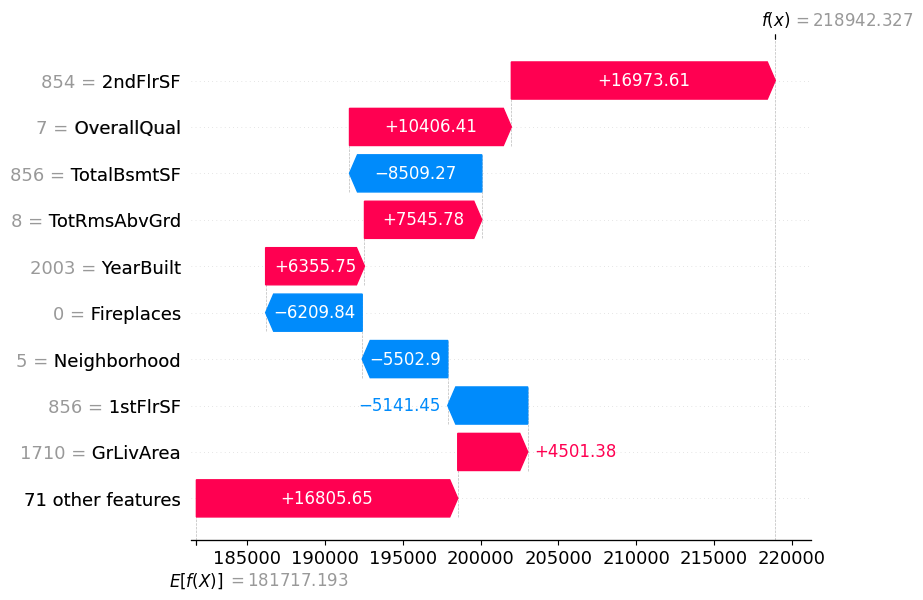

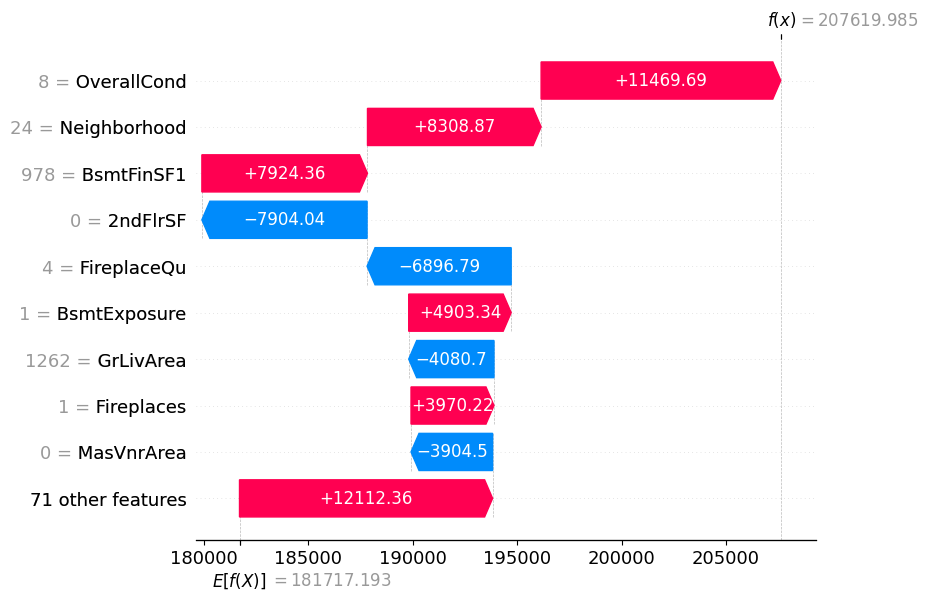

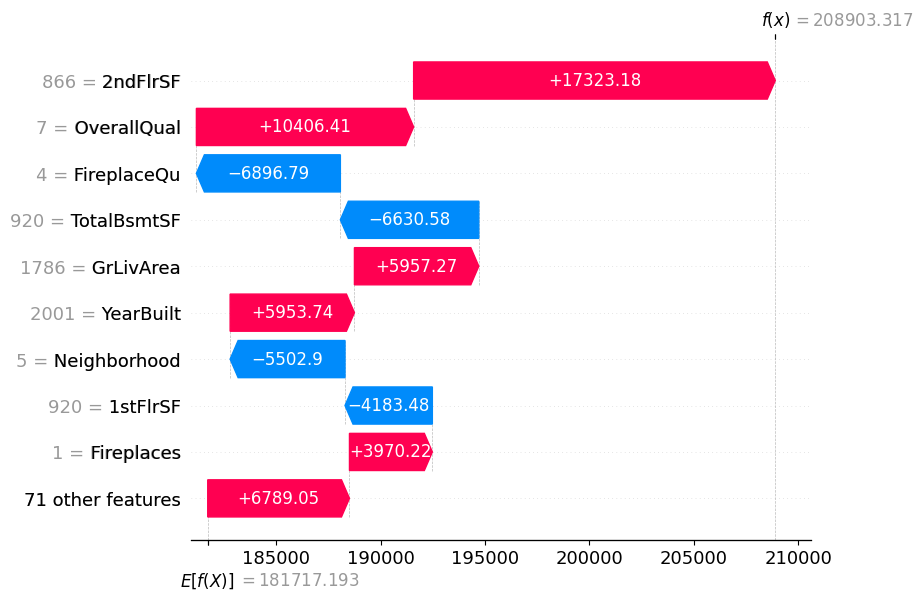

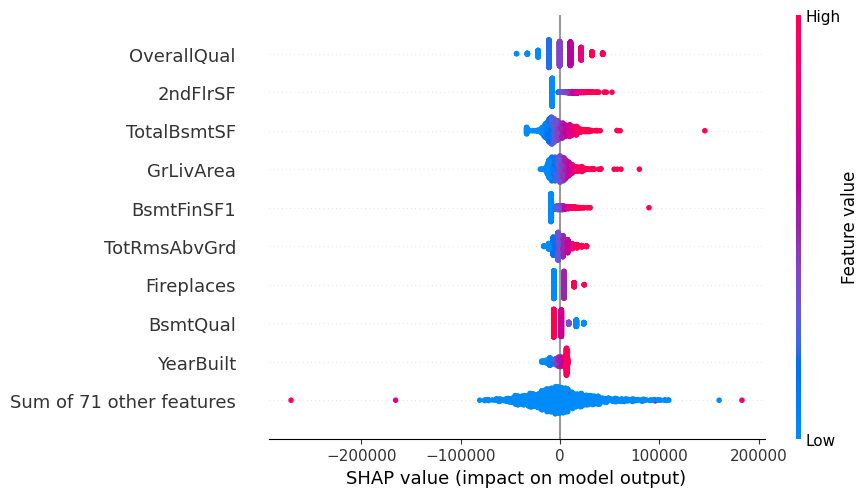

In [3]:
shap.plots.waterfall(shap_values[0]) #edit index if you wish to see other predictions
shap.plots.beeswarm(shap_values)
shap.initjs()
shap.plots.force(shap_values)

However, using the SHAP method, to get the TRUE value of each feature, we realize that the GrLivArea,OverallQual 2ndFlrSF and totalBsmtSF seem to be influencing house pricing the most.
While feature influence may vary according to every test houses, it is important to notice some patterns.
In summary:
The SHAP analysis of the set allowed us to determine the most infuencial feature of our set. We can see a clear difference between the coefficient of the linear regression model and the coefficients of the SHAP value interpretation. This highlight the importance to assess our model with tools such as SHAP.
